In [1]:
import env, acquire, wrangle, prepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

# Scaling Exercises
>Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.



### 1.Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
telco_df = wrangle.wrangle_telco()# import df using wrangle function.

In [3]:
telco_df

,customer_id,monthly_charges,tenure,total_charges,churn
5348,0040-HALCW,20.40,54.0,1090.60,No
5349,0042-RLHYP,19.70,69.0,1396.90,No
5350,0057-QBUQH,25.10,43.0,1070.15,No
5351,0064-SUDOG,20.30,12.0,224.50,No
5352,0071-NDAFP,25.50,25.0,630.60,No
...,...,...,...,...,...
7038,9919-FZDED,84.10,72.0,5981.65,No
7039,9926-PJHDQ,76.80,72.0,5468.45,No
7040,9928-BZVLZ,49.85,12.0,552.10,No
7041,9993-LHIEB,67.85,67.0,4627.65,No


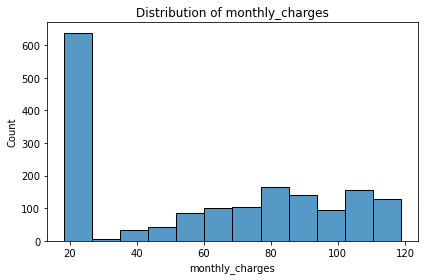

Counts for monthly_charges

19.70     21
19.85     21
20.05     19
19.55     18
19.75     17
          ..
23.40      1
93.15      1
96.90      1
115.60     1
62.15      1
Name: monthly_charges, Length: 820, dtype: int64



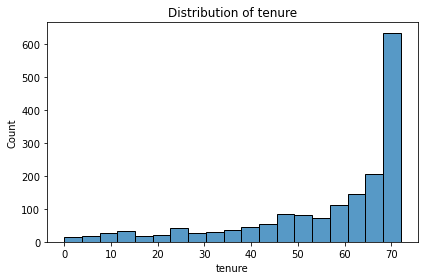

Counts for tenure

72.0    343
71.0    137
70.0     88
69.0     66
68.0     65
       ... 
9.0       3
1.0       2
28.0      1
2.0       1
5.0       1
Name: tenure, Length: 73, dtype: int64



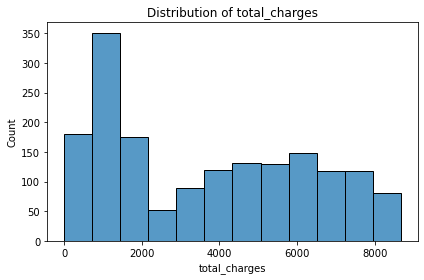

Counts for total_charges

0.00       10
1161.75     2
7334.05     2
343.45      2
1110.05     2
           ..
2893.40     1
6457.15     1
7782.85     1
4652.40     1
400.00      1
Name: total_charges, Length: 1678, dtype: int64



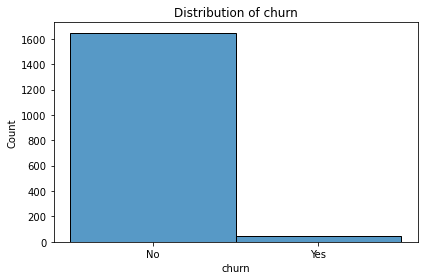

Counts for churn

No     1647
Yes      48
Name: churn, dtype: int64



In [4]:
# use for loop to plot all distributions
for x in telco_df.columns.drop(['customer_id']):
    sns.histplot(telco_df[x])
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()
    counts = telco_df[x].value_counts()
    print(f'Counts for {x}\n')
    print(f'{counts}\n')

In [5]:
train, validate, test = prepare.train_validate_test_split(telco_df) # split data

In [6]:
train

,customer_id,monthly_charges,tenure,total_charges,churn
6604,3298-QEICA,34.60,23.0,813.45,No
5573,3457-PQBYH,20.30,58.0,1160.75,No
6010,0572-ZJKLT,99.65,46.0,4630.20,No
5976,9814-AOUDH,19.50,53.0,1050.50,No
6172,4513-CXYIX,80.70,71.0,5676.00,No
...,...,...,...,...,...
5789,6928-ONTRW,19.70,72.0,1379.80,No
5446,1535-VTJOQ,25.15,24.0,553.00,No
6234,6035-RIIOM,97.20,54.0,5129.45,No
5670,5006-MXVRN,20.70,39.0,762.45,No


In [7]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [8]:
# create dfs that just contain the numeric variables
x_train = train[['monthly_charges','tenure','total_charges']]
x_validate = validate[['monthly_charges','tenure','total_charges']]
x_test = test[['monthly_charges','tenure','total_charges']]

In [9]:
# fit and transform the datasets with minmax
x_train_scaled = scaler.fit_transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

In [10]:
# turn it into a df for easy manipulation
x_train_scaled = pd.DataFrame(x_train_scaled)

In [11]:
# rename the columns for readability
x_train_scaled = x_train_scaled.rename(columns = {0:'monthly_charges',1:'tenure',2:'total_charges'})

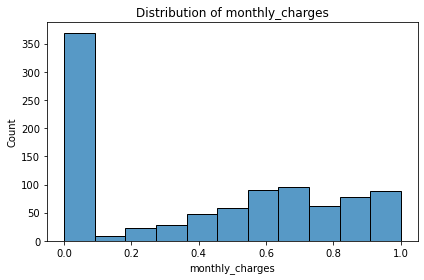

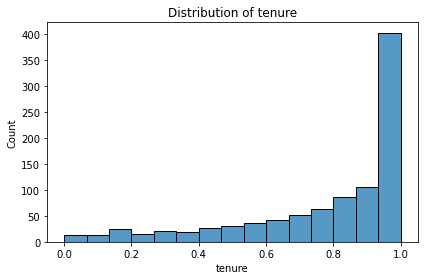

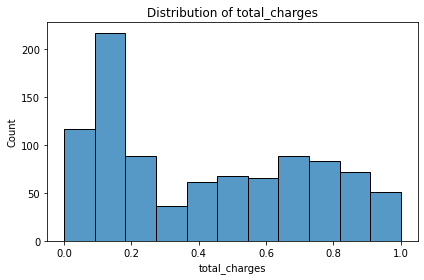

In [12]:
# loop it for distributions
for x in x_train_scaled:
    sns.histplot(x_train_scaled[x])
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()

> Takeaways: general shape of the distribution stays the same, but it scales the data down to 0<x<1 

In [13]:
# make a scaler using StandardScaler
scaler1 = sklearn.preprocessing.StandardScaler()

In [14]:
scaler1.fit(x_train) # fit it

StandardScaler()

In [15]:
#Transform the datasets 
x_train_scaled1 = scaler1.transform(x_train)
x_validate_scaled1 = scaler1.transform(x_validate)
x_test_scaled1 = scaler1.transform(x_test)

In [16]:
# put it in a dataframe for easy manipulation
x_train_scaled1 = pd.DataFrame(x_train_scaled1)

In [17]:
# rename columns for readability
x_train_scaled1 = x_train_scaled1.rename(columns = {0:'monthly_charges',1:'tenure',2:'total_charges'})

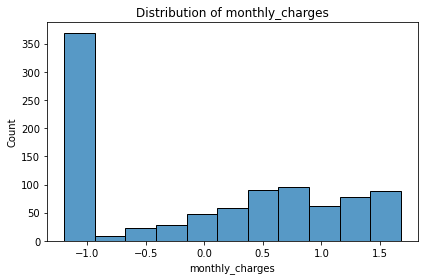

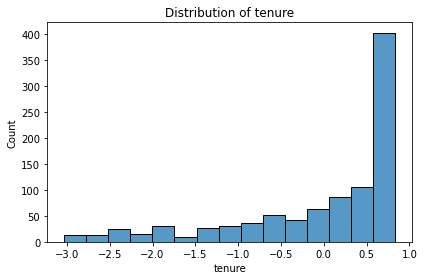

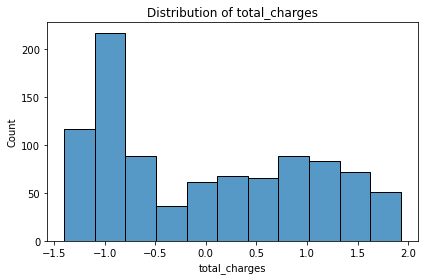

In [18]:
# for loop for making visualizations
for x in x_train_scaled1:
    sns.histplot(x_train_scaled1[x])
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()

> Takeaway: StandardScaler() places the mean at 0, and then scales everything by standard deviation. This gives negative and positive numbers. It mantains the distribution from the original

In [19]:
# create scaler using Robust
scaler2 = sklearn.preprocessing.RobustScaler()

#fit it
scaler2.fit(x_train)

# transform datasets
x_train_scaled2 = scaler2.transform(x_train)
x_validate_scaled2 = scaler2.transform(x_validate)
x_test_scaled2 = scaler2.transform(x_test)

# place in a df
x_train_scaled2 = pd.DataFrame(x_train_scaled2)

# rename columns for readability
x_train_scaled2 = x_train_scaled2.rename(columns = {0:'monthly_charges',1:'tenure',2:'total_charges'})

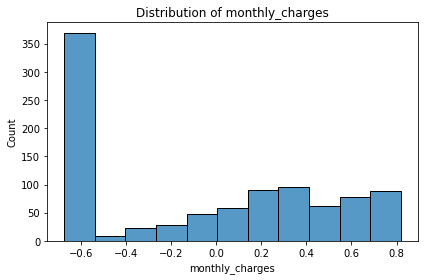

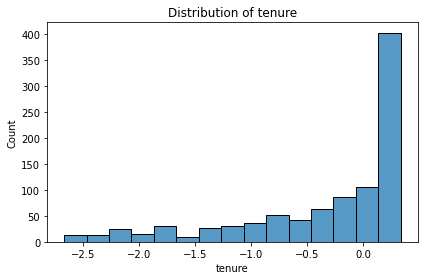

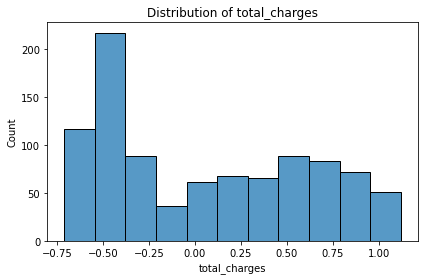

In [20]:
# plot visualizations
for x in x_train_scaled2:
    sns.histplot(x_train_scaled2[x])
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()

> Takeaway: does the same thing as standardScaler, but it more aggressively scales the outliers

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [21]:
# fit and transform the scaled data using scaler1, the minmax scaler
inverse_scaler = scaler.inverse_transform(x_train_scaled)

In [22]:
# place in dataframe, rename columns
inverse_scaler = pd.DataFrame(inverse_scaler)
inverse_scaler = inverse_scaler.rename(columns = {0:'monthly_charges',1:'tenure',2:'total_charges'})
inverse_scaler

,monthly_charges,tenure,total_charges
0,34.60,23.0,813.45
1,20.30,58.0,1160.75
2,99.65,46.0,4630.20
3,19.50,53.0,1050.50
4,80.70,71.0,5676.00
...,...,...,...
944,19.70,72.0,1379.80
945,25.15,24.0,553.00
946,97.20,54.0,5129.45
947,20.70,39.0,762.45


In [23]:
# do the same process on another scaled dataset
inverse_scaler1 = scaler1.inverse_transform(x_train_scaled1)
inverse_scaler1 = pd.DataFrame(inverse_scaler1)
inverse_scaler1 = inverse_scaler1.rename(columns = {0:'monthly_charges',1:'tenure',2:'total_charges'})
inverse_scaler1

,monthly_charges,tenure,total_charges
0,34.60,23.0,813.45
1,20.30,58.0,1160.75
2,99.65,46.0,4630.20
3,19.50,53.0,1050.50
4,80.70,71.0,5676.00
...,...,...,...
944,19.70,72.0,1379.80
945,25.15,24.0,553.00
946,97.20,54.0,5129.45
947,20.70,39.0,762.45


> Takeaways: .inverse_transform outputs do match the original dataset with some slight variation. My hypothesis is that the slight difference in values is due to how the floating numbers are handled when transformed and inverse_transformed. Its probably introducing a slight error that results in values being off by a small amount. 

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [24]:
# set quantiles to the size of the dataset so I dont get an error, output dist is normal
qt = sklearn.preprocessing.QuantileTransformer(n_quantiles = 949, output_distribution = 'normal')
x_train_quant = qt.fit_transform(x_train)# fit transform it

In [25]:
# put in a dataframe and rename columns
x_train_quant = pd.DataFrame(x_train_quant)
x_train_quant = x_train_quant.rename(columns = {0:'monthly_charges',1:'tenure',2:'total_charges'})

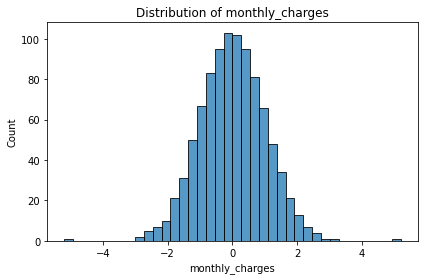

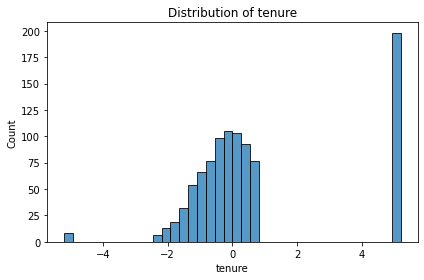

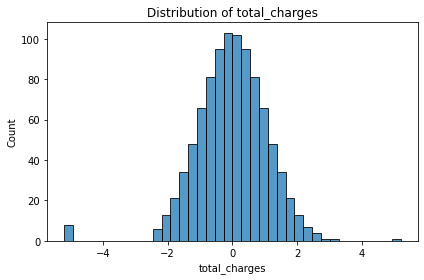

In [26]:
#visualize distributions
for x in x_train_quant:
    sns.histplot(x_train_quant[x])
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()

> Takeaways: setting it as normal put's it in a bell curve distribution , changes values to SD. This would be useful if you want to run a t test on non-normally distributed data. 

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [27]:
# remove the output_dist, uses default distribution which is 'uniform'
qt1 = sklearn.preprocessing.QuantileTransformer(n_quantiles = 949)
x_train_quant1 = qt1.fit_transform(x_train)# fit and transform data

In [28]:
# put it in a df and rename columns
x_train_quant1 = pd.DataFrame(x_train_quant1)
x_train_quant1 = x_train_quant1.rename(columns = {0:'monthly_charges',1:'tenure',2:'total_charges'})

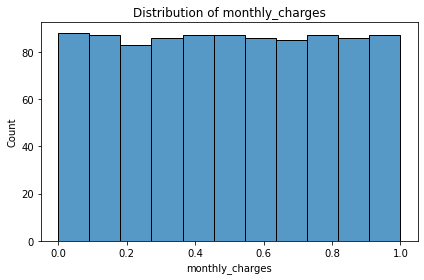

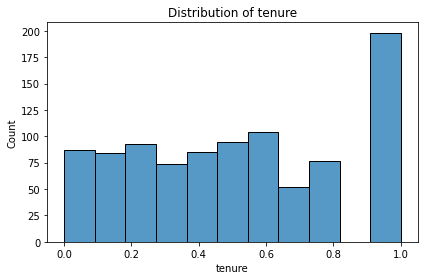

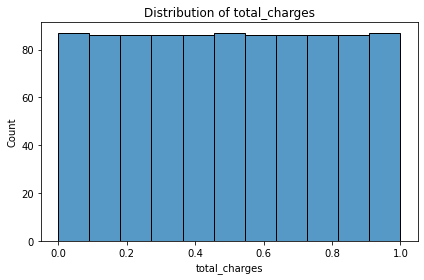

In [29]:
# plot dist
for x in x_train_quant1:
    sns.histplot(x_train_quant1[x])
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()

>Places all values on a range so that the distribution is uniform. 

### 5.Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [30]:
# this function will take a dataframe as an input and outputs a df with scaled values 
def minmax_scale(data_set):
    
    # create scaling object
    scaler = sklearn.preprocessing.MinMaxScaler()
    
    # fit and transform the data
    x_scaled = scaler.fit_transform(data_set)
    
    # place into a dataframe
    x_scaled = pd.DataFrame(x_scaled)
    
    # rename columns
    x_scaled.columns = data_set.columns
    
    return x_scaled

In [31]:
# testing the function in the workbook to ensure it works
minmax_scale(train[['monthly_charges','tenure','total_charges']])

,monthly_charges,tenure,total_charges
0,0.161435,0.319444,0.093797
1,0.018934,0.805556,0.133843
2,0.809666,0.638889,0.533898
3,0.010962,0.736111,0.121131
4,0.620827,0.986111,0.654486
...,...,...,...
944,0.012955,1.000000,0.159102
945,0.067265,0.333333,0.063765
946,0.785252,0.750000,0.591465
947,0.022920,0.541667,0.087916


In [32]:
# verifying it works as an import from a module
prepare.minmax_scale(train[['monthly_charges','tenure','total_charges']])

,monthly_charges,tenure,total_charges
0,0.161435,0.319444,0.093797
1,0.018934,0.805556,0.133843
2,0.809666,0.638889,0.533898
3,0.010962,0.736111,0.121131
4,0.620827,0.986111,0.654486
...,...,...,...
944,0.012955,1.000000,0.159102
945,0.067265,0.333333,0.063765
946,0.785252,0.750000,0.591465
947,0.022920,0.541667,0.087916
